In [1]:
import nltk

In [2]:
import spacy

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
sentence="The brown fox is quick and he is jumping over the lazy dog"

In [6]:
sentence

'The brown fox is quick and he is jumping over the lazy dog'

In [7]:
words=sentence.split()

In [8]:
np.random.shuffle(words)

In [9]:
print(words)

['over', 'is', 'fox', 'lazy', 'he', 'and', 'the', 'jumping', 'dog', 'The', 'brown', 'is', 'quick']


In [10]:
pos_tags=nltk.pos_tag(sentence.split())

In [11]:
pos_tags

[('The', 'DT'),
 ('brown', 'JJ'),
 ('fox', 'NN'),
 ('is', 'VBZ'),
 ('quick', 'JJ'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN')]

In [12]:
pd.DataFrame(pos_tags).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN


In [13]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [14]:
spacy_pos_tagged=[(word, word.tag_, word.pos) for word in nlp(sentence)]

In [15]:
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN
2,90,84,92,87,84,89,95,87,100,85,90,84,92


In [16]:
grammer='''
            NP: {<DT>?<JJ>?<NN.*>}
            ADJP:{<JJ>}
            ADVP:{<RB.*>}
            PP: {<IN>}
            VP: {<MD>?<VB*>+}
'''

In [17]:
rp=nltk.RegexpParser(grammer)

In [18]:
shallow_parsed_sent=rp.parse(pos_tags)

In [19]:
from nltk.corpus import brown

In [20]:
print("total categories:", len(brown.categories()))

total categories: 15


In [21]:
print("categories:", brown.categories())

categories: ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [22]:
brown.sents(categories='mystery')

[['There', 'were', 'thirty-eight', 'patients', 'on', 'the', 'bus', 'the', 'morning', 'I', 'left', 'for', 'Hanover', ',', 'most', 'of', 'them', 'disturbed', 'and', 'hallucinating', '.'], ['An', 'interne', ',', 'a', 'nurse', 'and', 'two', 'attendants', 'were', 'in', 'charge', 'of', 'us', '.'], ...]

In [23]:
brown.tagged_sents(categories='mystery')

[[('There', 'EX'), ('were', 'BED'), ('thirty-eight', 'CD'), ('patients', 'NNS'), ('on', 'IN'), ('the', 'AT'), ('bus', 'NN'), ('the', 'AT'), ('morning', 'NN'), ('I', 'PPSS'), ('left', 'VBD'), ('for', 'IN'), ('Hanover', 'NP'), (',', ','), ('most', 'AP'), ('of', 'IN'), ('them', 'PPO'), ('disturbed', 'VBN'), ('and', 'CC'), ('hallucinating', 'VBG'), ('.', '.')], [('An', 'AT'), ('interne', 'NN'), (',', ','), ('a', 'AT'), ('nurse', 'NN'), ('and', 'CC'), ('two', 'CD'), ('attendants', 'NNS'), ('were', 'BED'), ('in', 'IN'), ('charge', 'NN'), ('of', 'IN'), ('us', 'PPO'), ('.', '.')], ...]

In [24]:
sentences=brown.sents(categories='mystery')

In [25]:
sentences

[['There', 'were', 'thirty-eight', 'patients', 'on', 'the', 'bus', 'the', 'morning', 'I', 'left', 'for', 'Hanover', ',', 'most', 'of', 'them', 'disturbed', 'and', 'hallucinating', '.'], ['An', 'interne', ',', 'a', 'nurse', 'and', 'two', 'attendants', 'were', 'in', 'charge', 'of', 'us', '.'], ...]

In [26]:
sentences=[' '.join(sentence_token) for sentence_token in sentences]

In [27]:
sentences[0:5]

['There were thirty-eight patients on the bus the morning I left for Hanover , most of them disturbed and hallucinating .',
 'An interne , a nurse and two attendants were in charge of us .',
 "I felt lonely and depressed as I stared out the bus window at Chicago's grim , dirty West Side .",
 'It seemed incredible , as I listened to the monotonous drone of voices and smelled the fetid odors coming from the patients , that technically I was a ward of the state of Illinois , going to a hospital for the mentally ill .',
 'I suddenly thought of Mary Jane Brennan , the way her pretty eyes could flash with anger , her quiet competence , the gentleness and sweetness that lay just beneath the surface of her defenses .']

In [28]:
tagged_words=brown.tagged_words(categories='mystery')

In [29]:
nouns=[(word, tag) for word,tag in tagged_words if any(noun_tag in tag for noun_tag in ['NP','NN'])]

In [30]:
nouns

[('patients', 'NNS'),
 ('bus', 'NN'),
 ('morning', 'NN'),
 ('Hanover', 'NP'),
 ('interne', 'NN'),
 ('nurse', 'NN'),
 ('attendants', 'NNS'),
 ('charge', 'NN'),
 ('bus', 'NN'),
 ('window', 'NN'),
 ("Chicago's", 'NP$'),
 ('Side', 'NN-TL'),
 ('drone', 'NN'),
 ('voices', 'NNS'),
 ('odors', 'NNS'),
 ('patients', 'NNS'),
 ('ward', 'NN'),
 ('state', 'NN'),
 ('Illinois', 'NP'),
 ('hospital', 'NN'),
 ('Mary', 'NP'),
 ('Jane', 'NP'),
 ('Brennan', 'NP'),
 ('way', 'NN'),
 ('eyes', 'NNS'),
 ('anger', 'NN'),
 ('competence', 'NN'),
 ('gentleness', 'NN'),
 ('sweetness', 'NN'),
 ('surface', 'NN'),
 ('defenses', 'NNS'),
 ('friends', 'NNS'),
 ('stay', 'NN'),
 ('Cook', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Hospital', 'NN-TL'),
 ('stories', 'NNS'),
 ('newspapers', 'NNS'),
 ('adventure', 'NN'),
 ('Marshall', 'NP-TL'),
 ('Field', 'NP-TL'),
 ('Co.', 'NN-TL'),
 ('address', 'NN'),
 ('Coast', 'NN-TL'),
 ('student', 'NN'),
 ('university', 'NN'),
 ('studies', 'NNS'),
 ('relative', 'NN'),
 ('remorse', 'NN'),
 ('newspap

In [31]:
noun_freq=nltk.FreqDist([word for word, tag in nouns])

In [32]:
noun_freq

FreqDist({'man': 106, 'time': 82, 'door': 80, 'car': 69, 'room': 65, 'Mr.': 63, 'way': 61, 'office': 50, 'eyes': 48, 'hand': 46, ...})

In [33]:
noun_freq.most_common(10)

[('man', 106),
 ('time', 82),
 ('door', 80),
 ('car', 69),
 ('room', 65),
 ('Mr.', 63),
 ('way', 61),
 ('office', 50),
 ('eyes', 48),
 ('hand', 46)]

In [34]:
new_string="This is a string"

In [35]:
print("ID:", id(new_string))

ID: 1784374080832


In [36]:
print("Type:", type(new_string))

Type: <class 'str'>


In [37]:
print("Value:", new_string)

Value: This is a string


In [38]:
simple_string="Hello! "+"I'm a simple string"

In [39]:
simple_string

"Hello! I'm a simple string"

In [40]:
multi_line_string="""Hello I'm a

multi-line

string!

"""

In [41]:
multi_line_string

"Hello I'm a\n\nmulti-line\n\nstring!\n\n"

In [42]:
print(multi_line_string)

Hello I'm a

multi-line

string!




In [43]:
escaped_string="c:\the_folder\new_dir\file.txt"

In [44]:
escaped_string

'c:\the_folder\new_dir\x0cile.txt'

In [45]:
print(escaped_string)

c:	he_folder
ew_dirile.txt


In [46]:
raw_string=r"C:\the_folder\new_dir\file.txt"

In [47]:
raw_string

'C:\\the_folder\\new_dir\\file.txt'

In [53]:
string_with_unicode="H\uOOe8llo!"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 1-2: truncated \uXXXX escape (<ipython-input-53-b9ccff8f3323>, line 1)

In [55]:
multi_line_string[::-1]

"\n\n!gnirts\n\nenil-itlum\n\na m'I olleH"

In [56]:
s3="----*****-------"

In [57]:
s3*5

'----*****-----------*****-----------*****-----------*****-----------*****-------'

In [58]:
s3=('This '
   'is another way '
   'to concatenate '
   'several strings ')

In [59]:
s3

'This is another way to concatenate several strings '

In [61]:
'way' in s3

True

In [62]:
'python' in s3

False

In [63]:
len(s3)

51

In [64]:
s='PYTHON'

In [65]:
s, type(s)

('PYTHON', str)

In [66]:
for index, character in enumerate(s):
    print('Character->', character, 'has index ->', index)

Character-> P has index -> 0
Character-> Y has index -> 1
Character-> T has index -> 2
Character-> H has index -> 3
Character-> O has index -> 4
Character-> N has index -> 5


In [67]:
s[0],s[1],s[2],s[3],s[4],s[5]

('P', 'Y', 'T', 'H', 'O', 'N')

In [69]:
s[-1],s[-2],s[-3],s[-4],s[-5],s[-6]

('N', 'O', 'H', 'T', 'Y', 'P')

In [70]:
s[:]

'PYTHON'

In [71]:
s[1:4]

'YTH'

In [72]:
s[:3],s[3:]

('PYT', 'HON')

In [73]:
s[-3:]

'HON'

In [74]:
s[:3]+s[3:]

'PYTHON'

In [75]:
s[::1]

'PYTHON'

In [76]:
s[::2]

'PTO'

In [77]:
s[0]='X'

TypeError: 'str' object does not support item assignment

In [78]:
s='X'+s[1:]

In [79]:
s

'XYTHON'

In [80]:
s='python is great'

In [81]:
s.capitalize()

'Python is great'

In [82]:
s.upper()

'PYTHON IS GREAT'

In [83]:
s.title()

'Python Is Great'

In [84]:
s.replace('python','NLP')

'NLP is great'

In [85]:
'12345'.isdecimal()

True

In [86]:
'apollo123'.isdecimal()

False

In [88]:
'python'.isalpha()

True

In [89]:
'number1'.isalpha()

False

In [91]:
'total'.isalnum()

True

In [92]:
'abc123'.isalnum()

True

In [93]:
'1+1'.isalnum()

False

In [94]:
s="I,am,a,comma,separated,strimg"

In [95]:
s.split(',')

['I', 'am', 'a', 'comma', 'separated', 'strimg']

In [96]:
' '.join(s.split(','))

'I am a comma separated strimg'

In [97]:
s='  I am surrounded by spaces   '

In [98]:
s

'  I am surrounded by spaces   '

In [99]:
s.strip()

'I am surrounded by spaces'

In [104]:
sentences='Python is great. NLP is also good'

In [105]:
sentences.split('.')

['Python is great', ' NLP is also good']

In [106]:
print('\n'.join(sentences.split('.')))

Python is great
 NLP is also good


In [107]:
sentences.strip()

'Python is great. NLP is also good'

In [115]:
print('\n'.join([sentence.strip() for sentence in sentences.split('.') if sentence]))

Python is great
NLP is also good


In [116]:
'Hello %s' %('Python')

'Hello Python'

In [117]:
'Hello %s' %(12333)

'Hello 12333'

In [118]:
'Hello %s %s' %('world', 'How are you?')

'Hello world How are you?'

In [119]:
'My name is %s. I am %d years old. My height is around %.2f cm' %('Jerryl',29,178.3)

'My name is Jerryl. I am 29 years old. My height is around 178.30 cm'

In [120]:
'Hello {} {}, it is great to meet {}'.format('Jerryl','Davis','you')

'Hello Jerryl Davis, it is great to meet you'

In [122]:
'Hello {} {}, it\'s a great honor to meet you at {} o\' clock'.format('Sir','Arthur','9')

"Hello Sir Arthur, it's a great honor to meet you at 9 o' clock"

In [123]:
'I have a {food-item} and a {drink-item}'.format(food-item='sandwich', drink-item='soda')

SyntaxError: keyword can't be an expression (<ipython-input-123-98f22e0eee06>, line 1)

In [124]:
'The {animal} has the following attributes: {attributes}'.format(animal='dog', attributes=['lazy','loyal'])

"The dog has the following attributes: ['lazy', 'loyal']"

In [125]:
s1="Python is an excellent language"

In [126]:
s2="I love the Python language. I also use Python to build applications at work!"

In [127]:
import re

In [128]:
pattern='python'

In [129]:
re.match(pattern, s1)

In [130]:
re.match(pattern, s1, flags=re.IGNORECASE)

<re.Match object; span=(0, 6), match='Python'>

In [132]:
m=re.match(pattern, s1, flags=re.IGNORECASE)

In [133]:
print('Found match {} ranging from index {}-{} in the string "{}"'.format(m.group(0), m.start(),m.end(), s1))

Found match Python ranging from index 0-6 in the string "Python is an excellent language"


In [134]:
re.match(pattern, s2, re.IGNORECASE)

In [135]:
re.search(pattern, s2, re.IGNORECASE)

<re.Match object; span=(11, 17), match='Python'>

In [136]:
re.findall(pattern, s2, re.IGNORECASE)

['Python', 'Python']

In [137]:
matchobjs=re.finditer(pattern, s2, re.IGNORECASE)

In [140]:
print("String:", s2)
for m in matchobjs:
    print("Found match {} ranging from index {}-{}".format(m.group(0), m.start(), m.end()))

String: I love the Python language. I also use Python to build applications at work!
Found match Python ranging from index 11-17
Found match Python ranging from index 39-45


In [141]:
re.sub(pattern, 'Java',s2,flags=re.IGNORECASE)

'I love the Java language. I also use Java to build applications at work!'

In [147]:
s=u'H\u00e8llo! this is Python'

In [148]:
s

'Hèllo! this is Python'

In [149]:
re.findall(r'\w+', s)

['Hèllo', 'this', 'is', 'Python']

In [150]:
re.findall(r"[A-Z]\w+",s,re.UNICODE)

['Hèllo', 'Python']

In [151]:
from nltk.corpus import gutenberg

In [152]:
import matplotlib.pyplot as plt

In [153]:
%matplotlib inline

In [174]:
bible=gutenberg.open('bible-kjv.txt')

In [175]:
a=bible.readlines()

In [177]:
len(a)

99805

In [178]:
a[:5]

['[The King James Bible]\n',
 '\n',
 'The Old Testament of the King James Bible\n',
 '\n',
 'The First Book of Moses:  Called Genesis\n']

In [180]:
b=list(filter(None, [item.strip('\n') for item in a]))

In [181]:
len(b)

74645

In [184]:
line_heights=[len(sentence) for sentence in b]

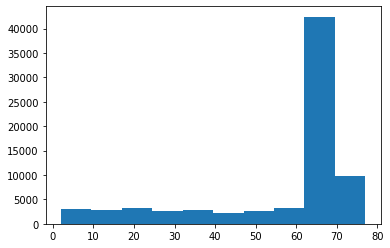

In [185]:
h=plt.hist(line_heights)

In [188]:
tokens=[item.split() for item in b]

In [189]:
tokens

[['[The', 'King', 'James', 'Bible]'],
 ['The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible'],
 ['The', 'First', 'Book', 'of', 'Moses:', 'Called', 'Genesis'],
 ['1:1',
  'In',
  'the',
  'beginning',
  'God',
  'created',
  'the',
  'heaven',
  'and',
  'the',
  'earth.'],
 ['1:2',
  'And',
  'the',
  'earth',
  'was',
  'without',
  'form,',
  'and',
  'void;',
  'and',
  'darkness',
  'was',
  'upon'],
 ['the',
  'face',
  'of',
  'the',
  'deep.',
  'And',
  'the',
  'Spirit',
  'of',
  'God',
  'moved',
  'upon',
  'the',
  'face',
  'of',
  'the'],
 ['waters.'],
 ['1:3',
  'And',
  'God',
  'said,',
  'Let',
  'there',
  'be',
  'light:',
  'and',
  'there',
  'was',
  'light.'],
 ['1:4',
  'And',
  'God',
  'saw',
  'the',
  'light,',
  'that',
  'it',
  'was',
  'good:',
  'and',
  'God',
  'divided',
  'the',
  'light'],
 ['from', 'the', 'darkness.'],
 ['1:5',
  'And',
  'God',
  'called',
  'the',
  'light',
  'Day,',
  'and',
  'the',
  'darkness',
  'he',
  'call

In [190]:
total_tokens_per_line=[len(sentence.split()) for sentence in b]

In [191]:
total_tokens_per_line

[4,
 8,
 7,
 11,
 13,
 16,
 1,
 12,
 15,
 3,
 13,
 10,
 15,
 9,
 12,
 11,
 4,
 12,
 5,
 13,
 13,
 13,
 12,
 13,
 13,
 9,
 12,
 13,
 9,
 11,
 14,
 15,
 14,
 14,
 1,
 14,
 13,
 14,
 15,
 14,
 11,
 12,
 14,
 4,
 11,
 10,
 14,
 12,
 12,
 11,
 13,
 13,
 5,
 14,
 12,
 9,
 14,
 15,
 14,
 8,
 15,
 8,
 13,
 11,
 16,
 7,
 13,
 15,
 15,
 15,
 12,
 13,
 14,
 12,
 14,
 1,
 15,
 14,
 12,
 14,
 13,
 15,
 14,
 15,
 16,
 1,
 14,
 4,
 14,
 13,
 1,
 14,
 7,
 16,
 15,
 13,
 15,
 8,
 14,
 14,
 10,
 15,
 6,
 14,
 12,
 15,
 8,
 14,
 13,
 16,
 6,
 15,
 10,
 14,
 14,
 11,
 6,
 15,
 15,
 4,
 15,
 14,
 14,
 9,
 15,
 13,
 13,
 10,
 14,
 1,
 14,
 15,
 15,
 15,
 16,
 15,
 2,
 14,
 15,
 12,
 15,
 15,
 14,
 8,
 14,
 11,
 1,
 15,
 14,
 11,
 14,
 15,
 9,
 14,
 12,
 15,
 9,
 15,
 13,
 13,
 13,
 14,
 14,
 13,
 6,
 13,
 11,
 12,
 13,
 14,
 14,
 15,
 14,
 15,
 14,
 9,
 13,
 3,
 15,
 4,
 16,
 15,
 14,
 14,
 5,
 16,
 13,
 7,
 14,
 9,
 14,
 9,
 15,
 9,
 14,
 13,
 13,
 9,
 15,
 11,
 14,
 11,
 14,
 13,
 3,
 14,
 14,
 13,
 2,
 1

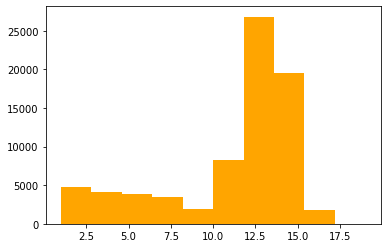

In [193]:
h=plt.hist(total_tokens_per_line, color='orange')

In [196]:
words=[word for sentence in tokens for word in sentence]

In [200]:
words=list(filter(None, [re.sub(r'[^A-Za-z]','',word) for word in words]))

In [201]:
print(words[:20])

['The', 'King', 'James', 'Bible', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses', 'Called', 'Genesis', 'In']


In [202]:
from collections import Counter
words=[word.lower() for word in words]

In [203]:
c=Counter(words)

In [204]:
c.most_common(10)

[('the', 64023),
 ('and', 51696),
 ('of', 34670),
 ('to', 13580),
 ('that', 12912),
 ('in', 12667),
 ('he', 10419),
 ('shall', 9838),
 ('unto', 8997),
 ('for', 8970)]

In [205]:
import nltk

In [206]:
stopwords=nltk.corpus.stopwords.words('english')

In [207]:
words=[word.lower() for word in words if word.lower() not in stopwords]

In [208]:
C=Counter(words)

In [209]:
C.most_common(10)

[('shall', 9838),
 ('unto', 8997),
 ('lord', 7830),
 ('thou', 5474),
 ('thy', 4600),
 ('god', 4442),
 ('said', 3999),
 ('ye', 3983),
 ('thee', 3826),
 ('upon', 2748)]